# Exploring Stock Information and Financial Statements

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import textwrap
from IPython.display import display, Markdown
from matplotlib.ticker import StrMethodFormatter
from prophet import Prophet
import yfinance as yf
import datetime
from datetime import datetime as dt, timedelta

In [31]:
# Displaying Stock Information
stock = 'WMT'
ticker = yf.Ticker(stock)

stock_name = ticker.info['longName']
business_summary = ticker.info['longBusinessSummary']

formatted_text = f"**Stock Name:** {stock_name}\n\n**Long Business Summary:**\n{textwrap.fill(business_summary, width=200)}"
display(Markdown(formatted_text))


**Stock Name:** Walmart Inc.

**Long Business Summary:**
Walmart Inc. engages in the operation of retail, wholesale, other units, and eCommerce worldwide. The company operates through three segments: Walmart U.S., Walmart International, and Sam's Club. It
operates supercenters, supermarkets, hypermarkets, warehouse clubs, cash and carry stores, and discount stores under Walmart and Walmart Neighborhood Market brands; membership-only warehouse clubs;
ecommerce websites, such as walmart.com.mx, walmart.ca, flipkart.com, PhonePe and other sites; and mobile commerce applications. The company offers grocery and consumables, including dairy, meat,
bakery, deli, produce, dry, chilled or frozen packaged foods, alcoholic and nonalcoholic beverages, floral, snack foods, candy, other grocery items, health and beauty aids, paper goods, laundry and
home care, baby care, pet supplies, and other consumable items; fuel, tobacco and other categories. It is also involved in the provision of health and wellness products covering pharmacy, optical and
hearing services, and over-the-counter drugs and other medical products; and home and apparel including home improvement, outdoor living, gardening, furniture, apparel, jewelry, tools and power
equipment, housewares, toys, seasonal items, mattresses and tire and battery centers. In addition, the company offers consumer electronics and accessories, software, video games, office supplies,
appliances, and third-party gift cards. Further, it operates digital payment platforms; and offers financial services and related products, including money transfers, bill payments, money orders,
check cashing, prepaid access, co-branded credit cards, installment lending, and earned wage access. Additionally, the company markets lines of merchandise under private brands, including Allswell,
Athletic Works, Equate, and Free Assembly. The company was formerly known as Wal-Mart Stores, Inc. and changed its name to Walmart Inc. in February 2018. Walmart Inc. was founded in 1945 and is based
in Bentonville, Arkansas.

In [32]:
# Retrieving Financial Statement Data

income_statement = ticker.income_stmt
balance_sheet = ticker.balance_sheet
cash_flow = ticker.cashflow

# PROFITABILITY RATIO

## 1. Gross Profit Margin(GPM)

In [33]:
GPM = round((income_statement.iloc[:, 0]['Gross Profit'] / income_statement.iloc[:, 0]['Total Revenue']) * 100, 2)
print(str(GPM) + '%')

24.38%


## 2. Operating Profit Margin(OPM)

In [34]:
OPM = round((income_statement.iloc[:, 0]['Operating Income'] / income_statement.iloc[:, 0]['Total Revenue']) * 100, 2)
print(str(OPM) + '%')

4.17%


## 3. Return On Assests(ROA)

In [35]:
ROA = round(income_statement.iloc[:, 0]['Net Income'] / balance_sheet.iloc[:, 0]['Total Assets'] * 100, 2)
print(str(ROA) + '%')

6.15%


## 4. Return On Equity(ROE)

In [36]:
ROE = round(income_statement.iloc[:, 0]['Net Income'] / balance_sheet.iloc[:, 0]['Stockholders Equity'] * 100, 2)
print(str(ROE) + '%')

18.5%


## 5. Return On Sales(ROS)

In [37]:
ROS = round(income_statement.iloc[:, 0]['Operating Income'] / income_statement.iloc[:, 0]['Total Revenue'] * 100, 2)
print(str(ROS) + '%')

4.17%


## 6. Return On Investment(ROI)

In [38]:
#The Return on Investment (ROI) for Walmart Inc. is not provided in this analysis due to the lack of specific data on the cost of investment during the evaluated period. Without this crucial information, calculating an accurate ROI would be incomplete and potentially misleading.

# LIQUIDITY RATIO

## 1. Current Ratio

In [39]:
CR = round(balance_sheet.iloc[:, 0]['Current Assets'] / balance_sheet.iloc[:, 0]['Current Liabilities'] , 2)
CR

0.83

## 2. Quick Ratio

In [40]:
QR = (balance_sheet.iloc[:, 0]['Current Assets'] - balance_sheet.iloc[:, 0]['Inventory']) / balance_sheet.iloc[:, 0]['Current Liabilities']
QR

0.23789428123140183

## 3. Cash Ratio

In [41]:
CAR = round(balance_sheet.iloc[:, 0]['Cash And Cash Equivalents'] / balance_sheet.iloc[:, 0]['Current Liabilities'] , 2)
CAR

0.11

# Price-to-Earning Ratio (P/E)

In [42]:
# MArket value per share as 52.37 from Historical Data
PE = 52.37/income_statement.iloc[:, 0]['Basic EPS']
PE

27.276041666666668

# Dividend Payout Ratio **Pending**

In [43]:
# Walmart Inc., the dividend-based financial ratios such as the Dividend Yield or Dividend Payout Ratio cannot be calculated due to the lack of dividend data.These ratios rely heavily on dividend payments as a fundamental component in their computation.

# Debt-to-Equity Ratio

In [44]:
DER = round(balance_sheet.iloc[:, 0]['Total Debt'] / balance_sheet.iloc[:, 0]['Stockholders Equity'] , 2)
DER

0.73

# CAPM

In [45]:
# Get current date and start date
start_date = "2013-04-01"
current_date = "2023-03-31"

# Fetch risk-free rate (10-year U.S. Treasury bond)
risk_free_data = yf.download("^TNX", start=start_date, end=current_date)
risk_free_rate = risk_free_data['Adj Close'][-1] / 100

# Fetch stock and market data
stock_data = yf.download(stock, start=start_date, end=current_date)
market_data = yf.download("^GSPC", start=start_date, end=current_date)

# Calculate beta
returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()
beta = returns.cov(market_returns) / market_returns.var()

# Calculate geometric mean of market returns
annualized_market_rate = (1 + np.prod(1 + market_returns)) ** (252 / len(market_returns)) - 1

# Calculate CAPM
expected_return_stock = risk_free_rate + beta * (annualized_market_rate - risk_free_rate)

# Display results
print("")
print(f"Risk-Free Rate: {risk_free_rate:.2%}")
print(f"Market Return: {annualized_market_rate:.2%}")
print(f"Beta: {beta:.4f}")
print(f"Expected Return for {stock}: {expected_return_stock:.2%}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Risk-Free Rate: 3.55%
Market Return: 13.66%
Beta: 0.5287
Expected Return for WMT: 8.89%


# Free Cash Flows

In [46]:
FCF = cash_flow.iloc[:, 0]['Operating Cash Flow'] + cash_flow.iloc[:, 0]['Capital Expenditure']
FCF

15120000000.0

# WACC

In [47]:
# Acquiring the 'Long Term Debt' element from Balance Sheet
long_term_debt = balance_sheet.iloc[:, 0]['Long Term Debt']
print("")
print(f"Long Term Debt : {long_term_debt}")

# Gathering all the required elements from Income Statement
interest_expense = income_statement.iloc[:, 0]['Interest Expense']
pretax_income = income_statement.iloc[:, 0]['Pretax Income']
net_income = income_statement.iloc[:, 0]['Net Income']

print(f"Interest Expense : {interest_expense}")
print(f"Pre Tax Income : {pretax_income}")
print(f"Net Income : {net_income}")

# Define other required financial variables
risk_free_data = yf.download("^TNX", start=start_date, end=current_date)
risk_free_rate = risk_free_data['Adj Close'][-1] / 100
beta = returns.cov(market_returns) / market_returns.var()
annualized_market_rate = (1 + np.prod(1 + market_returns)) ** (252 / len(market_returns)) - 1

# Calculate interest rate and tax rate
interest_rate = interest_expense / long_term_debt
tax_rate = (pretax_income - net_income) / net_income

print(f"Interest Rate : {interest_rate:.2%}")
print(f"Tax Rate : {tax_rate:.2%}")

# Calculate cost of debt
cost_of_debt = interest_rate * (1 - tax_rate)

# Calculate cost of equity using CAPM
cost_of_equity = risk_free_rate + (beta * (annualized_market_rate - risk_free_rate))

# Calculate equity weight
equity_weight = balance_sheet.iloc[:, 0]["Stockholders Equity"] / (balance_sheet.iloc[:, 0]["Stockholders Equity"] + balance_sheet.iloc[:, 0]['Total Liabilities Net Minority Interest'])

# Calculate WACC
wacc = (equity_weight * cost_of_equity) + ((1 - equity_weight) * cost_of_debt)

# Display the results
print(f"Cost of Debt of {stock_name}: {cost_of_debt:.2%}")
print(f"Equity Weight of {stock_name}: {equity_weight:.2%}")
print(f"Cost of Equity of {stock_name}: {cost_of_equity:.2%}")
print(f"Weighted Average Cost of Capital of {stock_name}: {wacc:.2%}")

[*********************100%%**********************]  1 of 1 completed


Long Term Debt : 36132000000.0
Interest Expense : 2683000000.0
Pre Tax Income : 21848000000.0
Net Income : 15511000000.0
Interest Rate : 7.43%
Tax Rate : 40.85%
Cost of Debt of Walmart Inc.: 4.39%
Equity Weight of Walmart Inc.: 34.13%
Cost of Equity of Walmart Inc.: 8.89%
Weighted Average Cost of Capital of Walmart Inc.: 5.93%


# Graphical Representation of the last One-year Stock Prices

[*********************100%%**********************]  1 of 1 completed


<Figure size 2000x800 with 0 Axes>

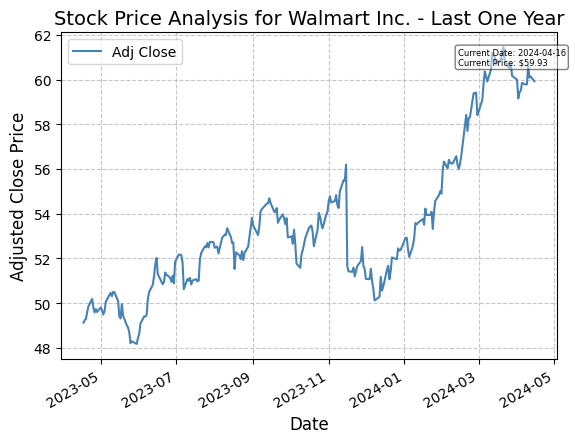

In [48]:
# Downloading data for the stock
data = yf.download(stock, start=(datetime.date.today() - datetime.timedelta(days=365)).strftime("%Y-%m-%d"))['Adj Close'].to_frame()

current_date = datetime.date.today().strftime("%Y-%m-%d")

# Get the current stock price
current_price = data.iloc[-1].iloc[0]

# Ensure this is the first command for plotting to set the size
plt.figure(figsize=(20, 8))

# Plotting the data
data.plot(label=stock, color='steelblue')

# Adding gridlines, title, labels, annotation, and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Stock Price Analysis for {stock_name} - Last One Year", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Close Price", fontsize=12)
plt.annotate(f"Current Date: {current_date}\nCurrent Price: ${current_price:.2f}",
             xy=(0.8, 0.9), xycoords='axes fraction', fontsize=6,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5))
plt.legend()

# Show the plot
plt.show()

# Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


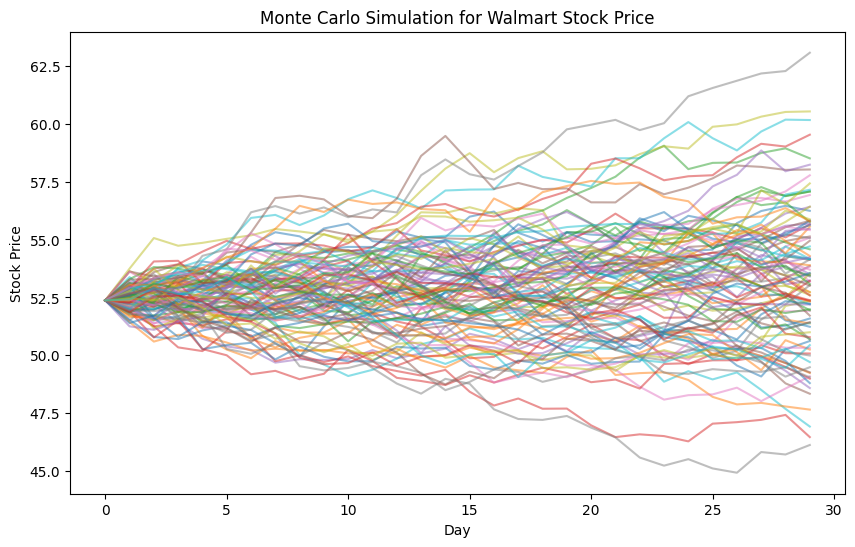

In [49]:
# Get historical stock data
stock_data = yf.download(stock, start="2023-01-01", end="2024-01-01")

# Calculate daily returns
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Calculate mean and standard deviation of daily returns
mean_daily_return = stock_data['Daily Return'].mean()
std_daily_return = stock_data['Daily Return'].std()

# Set the number of simulations and forecast period
num_simulations = 100
forecast_period = 30

# Set initial stock price as the last known closing price
initial_price = stock_data['Adj Close'][-1]

# Perform Monte Carlo simulation
simulated_prices = np.zeros((forecast_period, num_simulations))
for i in range(num_simulations):
    prices = [initial_price]
    for day in range(1, forecast_period):
        price_t = prices[-1]
        daily_return = np.random.normal(mean_daily_return, std_daily_return)
        price_t1 = price_t * (1 + daily_return)
        prices.append(price_t1)
    simulated_prices[:, i] = prices

# Plot simulations with multiple colors
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulated_prices[:, i], alpha=0.5)

plt.title('Monte Carlo Simulation for Walmart Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.show()

# FB Prophet Analysis

[*********************100%%**********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp0nmn3sh/hhy2k112.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp0nmn3sh/zmw_vay1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72161', 'data', 'file=/tmp/tmpp0nmn3sh/hhy2k112.json', 'init=/tmp/tmpp0nmn3sh/zmw_vay1.json', 'output', 'file=/tmp/tmpp0nmn3sh/prophet_model0vtxi1e3/prophet_model-20240416011852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


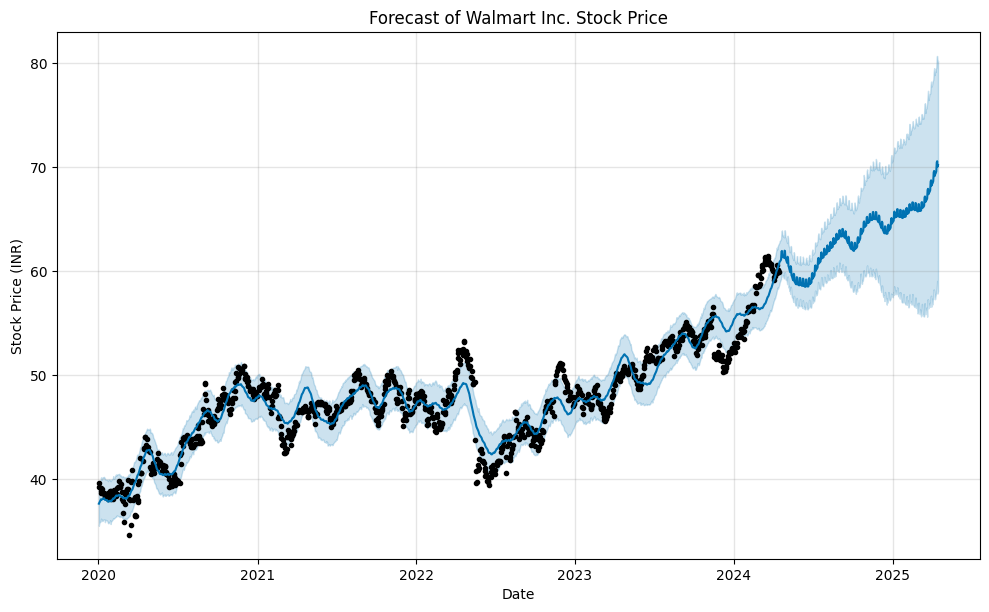

In [50]:
# Fetch historical stock price data for Walmart from Yahoo Finance
data = yf.download('WMT', start='2020-01-01')

# Reset index to make Date a column
data.reset_index(inplace=True)

# Prepare data for Prophet
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})
data = data[['ds', 'y']]

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Walmart Inc. Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.show()
